In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [32]:
df = pd.read_csv("topassist.csv")

# Drop unnecessary columns
drop_cols = [
    "Season", "Rank", "Player", "Club",
    "Crosses_Completed", "Assists_per_90",
    "xA_per_90", "Key_Passes_per_90"
]
df.drop(columns=drop_cols, inplace=True)

In [33]:
# Check nulls
print("Before filling:\n", df.isnull().sum())

# Fill numeric columns with mean
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns with 'Unknown'
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Check nulls again
print("\nAfter filling:\n", df.isnull().sum())

Before filling:
 Age                        0
Position                   0
Minutes_Played             0
Assists_prev_season      108
Goals_prev_season         88
Assists                    0
Key_Passes                 0
Expected_Assists_(xA)      0
Dribbles_Completed         0
Shots_Assisted             0
Set_Piece_Involvement      0
Club_Total_Goals           0
Club_League_Rank           0
Big6_Club_Feature          0
Club_Attack_Share          0
Club_xG                    0
dtype: int64

After filling:
 Age                      0
Position                 0
Minutes_Played           0
Assists_prev_season      0
Goals_prev_season        0
Assists                  0
Key_Passes               0
Expected_Assists_(xA)    0
Dribbles_Completed       0
Shots_Assisted           0
Set_Piece_Involvement    0
Club_Total_Goals         0
Club_League_Rank         0
Big6_Club_Feature        0
Club_Attack_Share        0
Club_xG                  0
dtype: int64


In [34]:
# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

Duplicates: 0


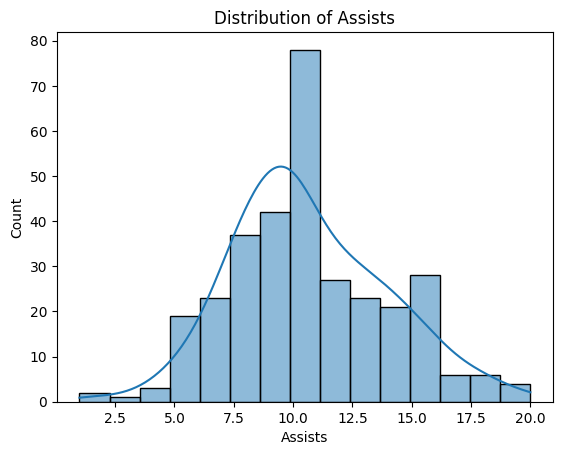

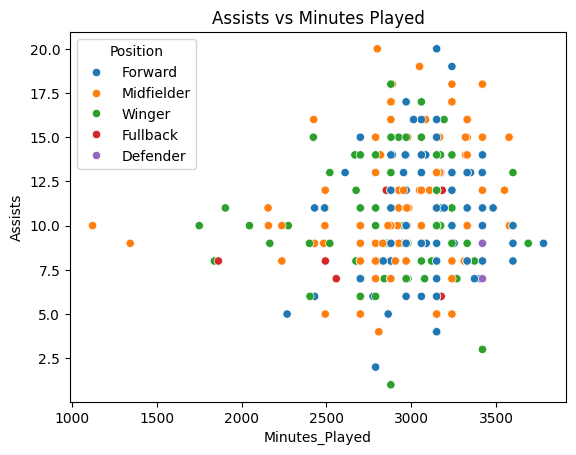

In [35]:
# Distribution of Assists
sns.histplot(df["Assists"], bins=15, kde=True)
plt.title("Distribution of Assists")
plt.show()

# Assists vs Minutes Played
sns.scatterplot(x="Minutes_Played", y="Assists", hue="Position", data=df)
plt.title("Assists vs Minutes Played")
plt.show()

In [36]:
# Detect outliers in 'Assists'
Q1 = df["Assists"].quantile(0.25)
Q3 = df["Assists"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["Assists"] < (Q1 - 1.5 * IQR)) | (df["Assists"] > (Q3 + 1.5 * IQR))]
print("Outliers in Assists:", outliers.shape[0])

Outliers in Assists: 0


In [37]:
# Feature Engineering
df["Assists_per_90"] = df["Assists"] / (df["Minutes_Played"] / 90)
df["Goals_per_90"] = df["Goals_prev_season"] / (df["Minutes_Played"] / 90)
df["Contribution_Ratio"] = (df["Assists"] + df["Goals_prev_season"]) / df["Club_Total_Goals"]
df["Dribbles_per_90"] = df["Dribbles_Completed"] / (df["Minutes_Played"] / 90)
df["Shots_Assisted_per_90"] = df["Shots_Assisted"] / (df["Minutes_Played"] / 90)


In [38]:

label_cols = ["Position", "Set_Piece_Involvement", "Big6_Club_Feature"]

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])
print(df.head())

   Age  Position  Minutes_Played  Assists_prev_season  Goals_prev_season  \
0   28         1            3350                 15.0               14.0   
1   22         3            2985                  3.0                3.0   
2   23         4            2954                  2.0               11.0   
3   32         3            1121                 16.0                7.0   
4   33         3            3241                  8.0                9.0   

   Assists  Key_Passes  Expected_Assists_(xA)  Dribbles_Completed  \
0       13          55                    6.5                  53   
1       11          46                    6.2                  62   
2       10          48                    6.1                  57   
3       10          38                    5.9                  15   
4       10          58                    7.2                  19   

   Shots_Assisted  ...  Club_Total_Goals  Club_League_Rank  Big6_Club_Feature  \
0              55  ...                76       

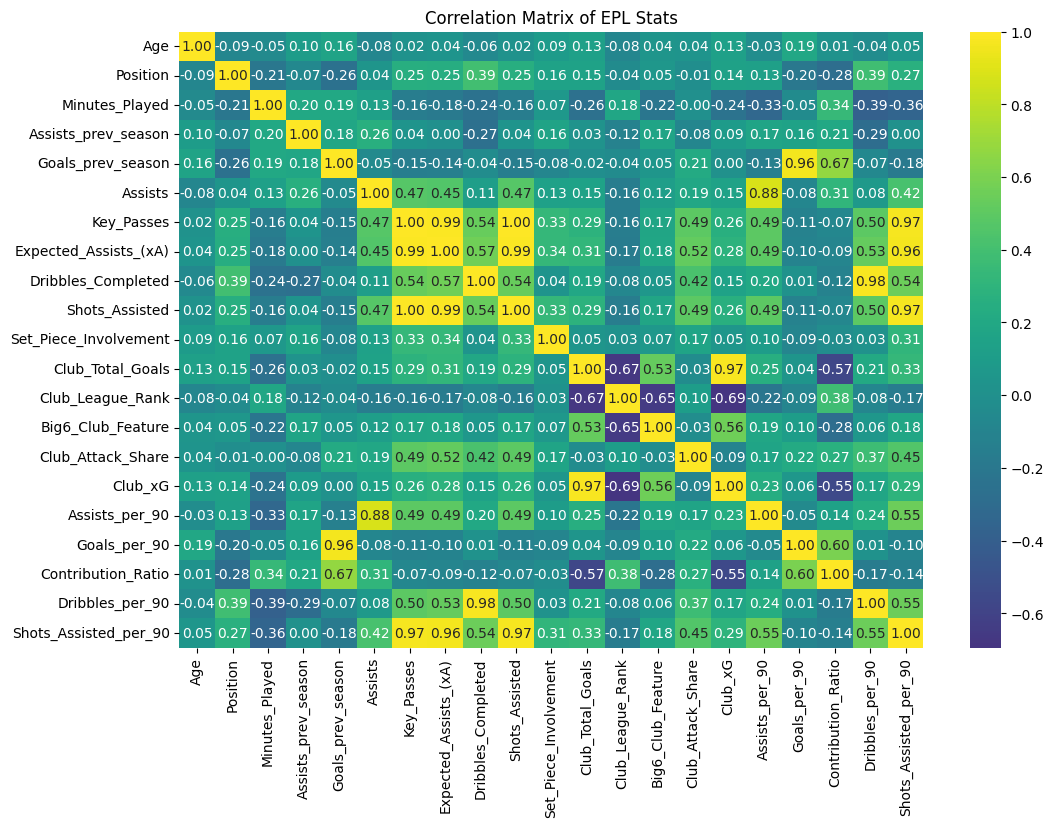

In [39]:


# Compute correlation matrix
corr = df.corr()

# Plot heatmap with values in the grid
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis", center=0)
plt.title("Correlation Matrix of EPL Stats")
plt.show()


In [40]:

# Features and target
X = df.drop(columns=["Assists"])
y = df["Assists"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Squared Error: 0.38958437499999987
Root Mean Squared Error: 0.6241669448152473
R² Score: 0.9686372327044025


In [28]:
import joblib

# Save trained model
joblib.dump(model, "top_assist_model.pkl")

print("✅ Model saved as top_assist_model.pkl")


✅ Model saved as top_assist_model.pkl
